In [70]:
# required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [78]:
df1 = pd.read_csv("Pressure readings 1.csv")
df2 = pd.read_csv("Pressure readings 2.csv")
df3 = pd.read_csv("Pressure readings 3.csv")
df4 = pd.read_csv("Pressure readings 4.csv")
df5 = pd.read_csv("Pressure readings 5.csv")
df6 = pd.read_csv("Pressure readings 6.csv")
df7 = pd.read_csv("Pressure readings 7.csv")
df8 = pd.read_csv("Pressure readings 8.csv")
df9 = pd.read_csv("Pressure readings 9.csv")
df10 = pd.read_csv("Pressure readings 10.csv")
df11 = pd.read_csv("Pressure readings 11.csv")
df12 = pd.read_csv("Pressure readings 12.csv")
df13 = pd.read_csv("Pressure readings 13.csv")
df14 = pd.read_csv("Pressure readings 14.csv")
df15 = pd.read_csv("Pressure readings 15.csv")
df16 = pd.read_csv("Pressure readings 16.csv")
df17 = pd.read_csv("Pressure readings 17.csv")
df18 = pd.read_csv("Pressure readings 18.csv")
df19 = pd.read_csv("Pressure readings 19.csv")
df20 = pd.read_csv("Pressure readings 20.csv")
df21 = pd.read_csv("Pressure readings 21.csv")
df22 = pd.read_csv("Pressure readings 22.csv")
df23 = pd.read_csv("Pressure readings 23.csv")
df24 = pd.read_csv("Pressure readings 24.csv")


In [79]:
# make list of data frames
data_frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12,
               df13, df14, df15, df16, df17, df18, df19, df20, df21, df22, df23, df24]

In [80]:
# method for renaming data columns based on counter
def relabel_df(df, counter):
    df.rename(columns = {"Time": "Time",
                          "Pressure reading": "Pressure"+str(counter)}, inplace = True)
    

In [81]:
# loop through data frames and call rename function
for i in range(len(data_frames)):
    relabel_df(data_frames[i], i+1)

In [82]:
# concat all data frames into one dataframe
df_main = pd.concat(data_frames, axis= 1)
# drop time columns
df_main = df_main.drop(columns = ["Time"])
df_main.head()

,Pressure1,Pressure2,Pressure3,Pressure4,Pressure5,Pressure6,Pressure7,Pressure8,Pressure9,Pressure10,...,Pressure15,Pressure16,Pressure17,Pressure18,Pressure19,Pressure20,Pressure21,Pressure22,Pressure23,Pressure24
0,1038.8,1032.4,1036.3,1038.3,1035.6,1042.4,1041.0,1042.2,1040.9,1042.5,...,1038.7,1033.2,1065.9,1042.2,1032.5,1039.6,1040.3,1033.6,1033.0,1038.8
1,1039.0,1032.4,1036.3,1038.2,1035.6,1042.4,1041.0,1042.3,1041.0,1042.6,...,1038.7,1033.3,1065.7,1042.3,1032.4,1039.5,1040.4,1033.7,1033.1,1038.8
2,1038.7,1032.4,1036.3,1038.2,1035.5,1042.4,1041.0,1042.3,1040.9,1042.6,...,1038.7,1033.2,1065.9,1042.2,1032.4,1039.6,1040.3,1033.7,1032.9,1038.8
3,1038.7,1032.3,1036.3,1038.2,1035.6,1042.3,1041.0,1042.2,1041.0,1042.5,...,1038.7,1033.2,1065.9,1042.3,1032.5,1039.6,1040.4,1033.6,1032.9,1038.8
4,1038.8,1032.3,1036.3,1038.1,1035.5,1042.4,1041.0,1042.3,1041.0,1042.6,...,1038.7,1033.2,1065.8,1042.3,1032.4,1039.5,1040.2,1033.7,1033.0,1038.7


In [83]:
# create a function for normalising the data based on baseline
def normalise_column(column):
    mean_baseline = np.mean(column[:5])
    std_baseline = np.std(column[:5])
    return (column - mean_baseline)

    

In [84]:
norm_df = df_main.apply(normalise_column)
norm_df.head()

,Pressure1,Pressure2,Pressure3,Pressure4,Pressure5,Pressure6,Pressure7,Pressure8,Pressure9,Pressure10,...,Pressure15,Pressure16,Pressure17,Pressure18,Pressure19,Pressure20,Pressure21,Pressure22,Pressure23,Pressure24
0,0.0,0.04,0.0,0.1,0.04,0.02,0.0,-0.06,-0.06,-0.06,...,0.0,-0.02,0.06,-0.06,0.06,0.04,-0.02,-0.06,0.02,0.02
1,0.2,0.04,0.0,0.0,0.04,0.02,0.0,0.04,0.04,0.04,...,0.0,0.08,-0.14,0.04,-0.04,-0.06,0.08,0.04,0.12,0.02
2,-0.1,0.04,0.0,0.0,-0.06,0.02,0.0,0.04,-0.06,0.04,...,0.0,-0.02,0.06,-0.06,-0.04,0.04,-0.02,0.04,-0.08,0.02
3,-0.1,-0.06,0.0,0.0,0.04,-0.08,0.0,-0.06,0.04,-0.06,...,0.0,-0.02,0.06,0.04,0.06,0.04,0.08,-0.06,-0.08,0.02
4,0.0,-0.06,0.0,-0.1,-0.06,0.02,0.0,0.04,0.04,0.04,...,0.0,-0.02,-0.04,0.04,-0.04,-0.06,-0.12,0.04,0.02,-0.08


In [85]:
# smooth the data
def smooth_data(column):
    return column.rolling(window = 3).mean()

In [86]:
smoothed_df = norm_df.apply(smooth_data)
#smoothed_df = df_main.apply(smooth_data)

<>:10: SyntaxWarning: invalid escape sequence '\ '
<>:10: SyntaxWarning: invalid escape sequence '\ '
C:\Users\TomaszLasota\AppData\Local\Temp\ipykernel_25920\3194086538.py:10: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel("/\ Pressure")


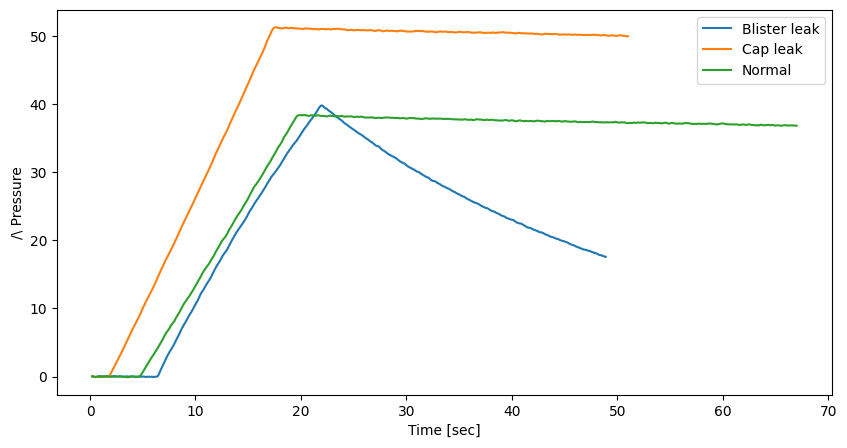

In [130]:
# define a function for plotting 

def plot_line(df, j, l):
    column_names = df.columns.tolist()
    column_data = df.loc[:, column_names[j]]
    time_count = df.index.tolist()
    time_count_time = [i * 0.1 for i in range(len(time_count))]
    plt.plot(time_count_time, column_data, label = l)
    plt.xlabel("Time [sec]")
    plt.ylabel("/\ Pressure")
    plt.legend()
      
plt.figure(figsize=(10, 5))
plot_line(smoothed_df, 1, "Blister leak")
plot_line(smoothed_df, 5, "Cap leak")
plot_line(smoothed_df, 10, "Normal")

plt.show()
   


<>:10: SyntaxWarning: invalid escape sequence '\ '
<>:10: SyntaxWarning: invalid escape sequence '\ '
C:\Users\TomaszLasota\AppData\Local\Temp\ipykernel_25920\547832238.py:10: SyntaxWarning: invalid escape sequence '\ '
  plt.ylabel("/\ Pressure")


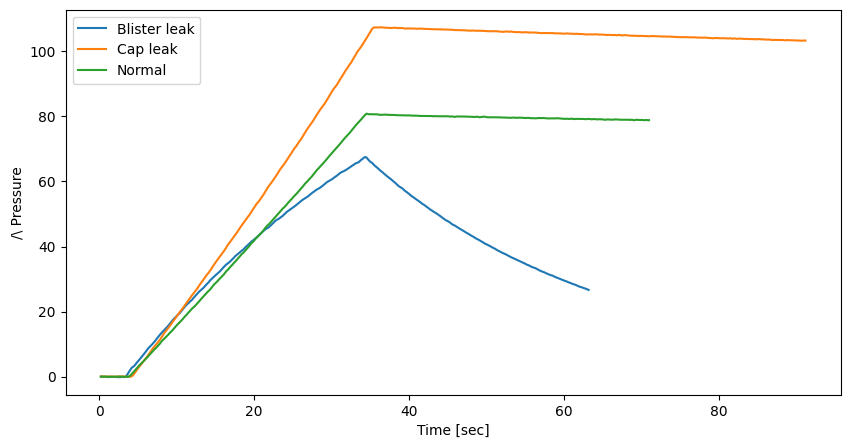

In [131]:
# define a function for plotting 

def plot_line(df, j, l):
    column_names = df.columns.tolist()
    column_data = df.loc[:, column_names[j]]
    time_count = df.index.tolist()
    time_count_time = [i * 0.1 for i in range(len(time_count))]
    plt.plot(time_count_time, column_data, label = l)
    plt.xlabel("Time [sec]")
    plt.ylabel("/\ Pressure")
    plt.legend()
      
plt.figure(figsize=(10, 5))
plot_line(smoothed_df, 18, "Blister leak")
plot_line(smoothed_df, 15, "Cap leak")
plot_line(smoothed_df, 21, "Normal")

plt.show()

In [88]:
# find the index of maximum pressure value for each column
index_list = (smoothed_df.idxmax())
slope_list = []

for i in range(len(index_list)):
    start_index = index_list[i] + 10
    end_index = start_index + 100
    range_index = np.arange(start_index, end_index + 1).reshape(-1, 1)
    data = smoothed_df.iloc[start_index : end_index + 1, i]
    model = LinearRegression().fit(range_index, data)
    slope = model.coef_[0]
    slope_list.append(slope)


C:\Users\TomaszLasota\AppData\Local\Temp\ipykernel_25920\2345763037.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_index = index_list[i] + 10
C:\Users\TomaszLasota\AppData\Local\Temp\ipykernel_25920\2345763037.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_index = index_list[i] + 10
C:\Users\TomaszLasota\AppData\Local\Temp\ipykernel_25920\2345763037.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start_inde

In [89]:
slope_list

[-0.10216346340516398,
 -0.10224267132595606,
 -0.11131896719083667,
 -0.11291438555620227,
 -0.11660454280722155,
 -0.0042333527470397704,
 -0.0041832653853616,
 -0.0047462628615792335,
 -0.0038609978644925597,
 -0.003960784313725123,
 -0.004514463211026229,
 -0.003821393904096057,
 -0.0033822558726458287,
 -0.004929528246942838,
 -0.004097456804504871,
 -0.007762376237623904,
 -0.007684721413317806,
 -0.007476606484178062,
 -0.1809306930693068,
 -0.1810250436808387,
 -0.08303086779266156,
 -0.006502038439137863,
 -0.007275480489225938,
 -0.005378761405553096]

In [90]:
from scipy.stats import f_oneway

In [91]:
# test for significance between slope means of cap leads vs normal 100 ul volume
blister_100 = slope_list[0:5]
cap_100 = slope_list[5:10]
normal_100 = slope_list[10:15]

print(f_oneway(cap_100, normal_100))

F_onewayResult(statistic=0.024006106189482502, pvalue=0.880707161620652)


In [92]:
cap_200 = slope_list[15:18]
normal_200 = slope_list[22:25]

In [96]:
# test for significance between slope means of cap leads vs normal 100 ul volume
print(f_oneway(cap_200, normal_200))

F_onewayResult(statistic=3.3742322170664534, pvalue=0.163540397756015)


In [ ]:
mean_blister_100 = np.mean(slope_list[0:5])
std_blister_100 = np.std(slope_list[0:5])

mean_cap_100 = np.mean(slope_list[5:10])
std_cap_100 = np.std(slope_list[5:10])

mean_normal_100 = np.mean(slope_list[10:15])
std_blister_100 = np.std(slope_list[10:15])



In [124]:
max_list = (smoothed_df.max())
max_list_index = (smoothed_df.idxmax())
max_list
#max_list_index

Pressure1      35.133333
Pressure2      39.773333
Pressure3      39.266667
Pressure4      38.666667
Pressure5      41.540000
Pressure6      51.253333
Pressure7      53.700000
Pressure8      56.540000
Pressure9      42.206667
Pressure10     53.706667
Pressure11     38.373333
Pressure12     41.440000
Pressure13     43.413333
Pressure14     45.580000
Pressure15     33.433333
Pressure16    107.413333
Pressure17     81.226667
Pressure18    106.973333
Pressure19     67.493333
Pressure20     62.873333
Pressure21     23.613333
Pressure22     80.806667
Pressure23     89.953333
Pressure24     80.920000
dtype: float64

In [95]:
max_normal = df_main.max()
max_normal

Pressure1     1074.0
Pressure2     1072.2
Pressure3     1075.7
Pressure4     1077.0
Pressure5     1077.1
Pressure6     1093.7
Pressure7     1094.8
Pressure8     1098.9
Pressure9     1083.2
Pressure10    1096.3
Pressure11    1071.9
Pressure12    1074.2
Pressure13    1077.2
Pressure14    1079.6
Pressure15    1072.2
Pressure16    1140.7
Pressure17    1147.1
Pressure18    1149.3
Pressure19    1100.1
Pressure20    1102.5
Pressure21    1064.1
Pressure22    1114.5
Pressure23    1123.0
Pressure24    1119.7
dtype: float64